## Build an MNIST model using the RESNET-34 ARCH

### Overview
In this project, the main aim is to build the `RESNET` Convolutional Neural Network Architecture (The 34-Nets Variant). To see the power of this architecture, we would need to train some data on it, to not make things to complex I choose the MNIST dataset for this project. Even though a much simpler network would give us the same performance obtained below, the goal of this project isn't to train a model on the MNIST dataset but to construct the `RESNET` Architecture. You can read more on the architecture [here](https://arxiv.org/abs/1512.03385).


### Approach
+ Load and preprocess the MNIST dataset using tensorflow-keras
+ Build the implement the RESNET-34
+ Train the model on the dataset
+ Evaluate the model

*A batch size of 16 was used during training, because my computer didn't have enough memory to handle more than that.*

### Import libraries

In [22]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from residual_unit import ResidualUnit

### Libraries versions

In [21]:
print(f"Tensorflow[gpu] version: {tf.__version__}")
print(f"Numpy version: {np.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")

Tensorflow[gpu] version: 2.15.0
Numpy version: 1.26.3
Matplotlib version: 3.8.2


In [3]:
tf.random.set_seed(69)
np.random.seed(69)

### Load datasets

In [4]:
(X_train_valid, y_train_valid), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train, y_train = X_train_valid[5000:], y_train_valid[5000:]
X_valid, y_valid = X_train_valid[:5000], y_train_valid[:5000]

In [5]:
def preprocess(X: np.ndarray) -> np.ndarray:
    normalize_X = tf.cast(X, tf.float32) / 255.0
    new_X = normalize_X[..., np.newaxis]
    return new_X

### Preprocess datasets

In [7]:
X_train = preprocess(X_train)
X_valid = preprocess(X_valid)
X_test = preprocess(X_test)

### Build the RESNET-34 CNN_ARCH model

In [8]:
model = keras.models.Sequential()
prev_fmap_size = 64
model.add(keras.layers.Conv2D(prev_fmap_size, 7, strides=1, input_shape=[28,28,1], padding="same",use_bias=False))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPooling2D(pool_size=(3,3), strides=2, padding="same"))
for fmap_size in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
    strides = 1 if fmap_size == prev_fmap_size else  2
    prev_fmap_size = fmap_size
    model.add(ResidualUnit(fmap_size, strides=strides))
model.add(keras.layers.GlobalAveragePooling2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation="softmax"))

### Model layers preview (Summary)

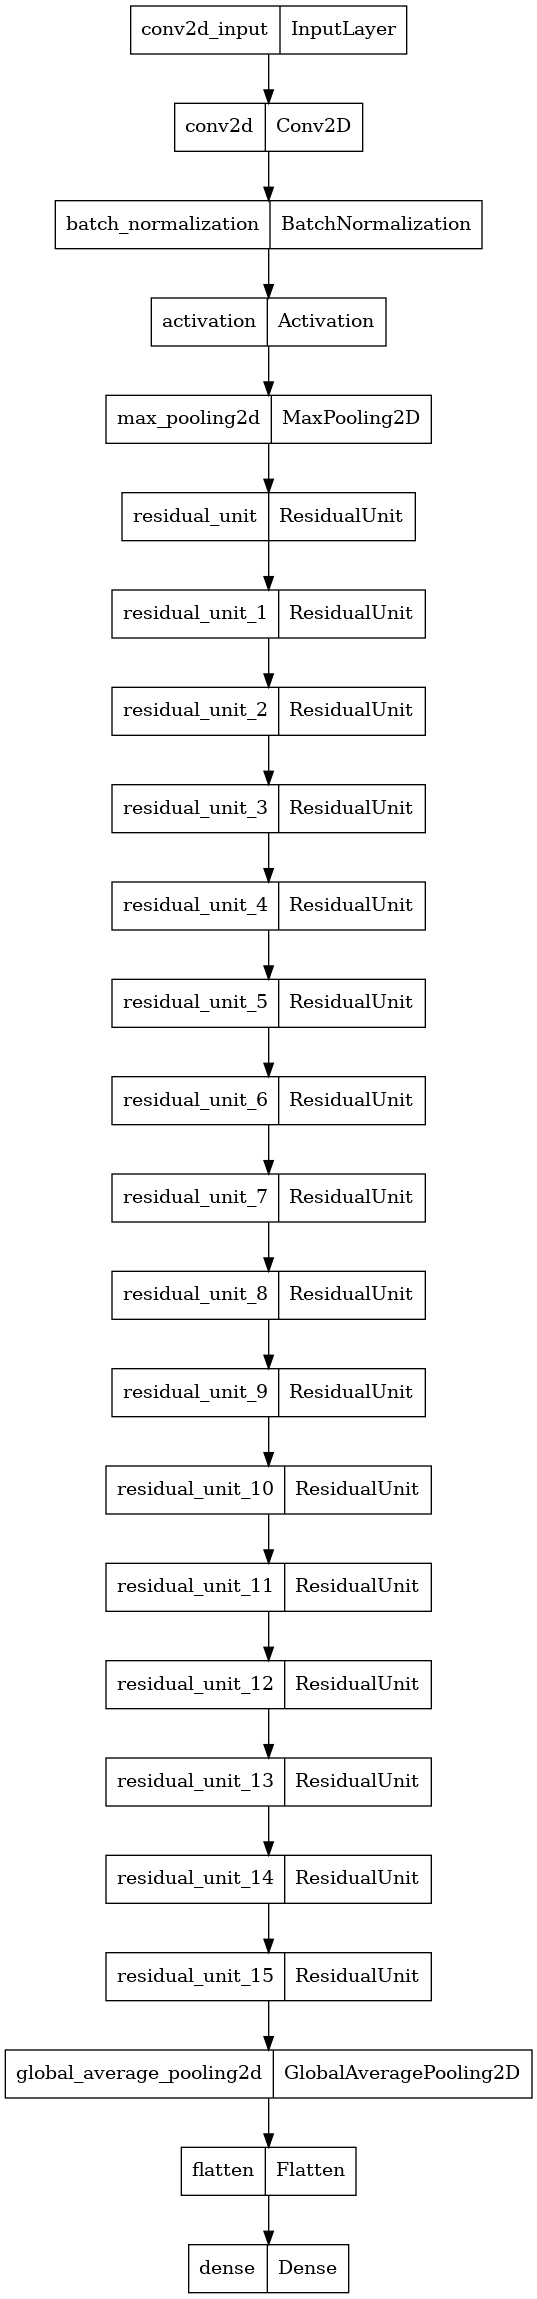

In [9]:
keras.utils.plot_model(model)

In [12]:
model.compile(optimizer="nadam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

### Model training and validation

In [13]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True, mode="min")
model_chkpoint = keras.callbacks.ModelCheckpoint(filepath="best_model", save_best_only=True, monitor="val_loss", mode="min")
history = model.fit(X_train ,y_train, validation_data=(X_valid, y_valid), 
                    callbacks=[early_stopping, model_chkpoint], epochs=5, batch_size=16)

Epoch 1/5
3438/3438 [==============================] - ETA: 0s - loss: 0.1007 - accuracy: 0.9723INFO:tensorflow:Assets written to: best_model/assets


INFO:tensorflow:Assets written to: best_model/assets


3438/3438 [==============================] - 326s 90ms/step - loss: 0.1007 - accuracy: 0.9723 - val_loss: 0.0546 - val_accuracy: 0.9858
Epoch 2/5
3438/3438 [==============================] - 303s 88ms/step - loss: 0.0603 - accuracy: 0.9832 - val_loss: 0.0582 - val_accuracy: 0.9840
Epoch 3/5
3438/3438 [==============================] - ETA: 0s - loss: 0.0414 - accuracy: 0.9877INFO:tensorflow:Assets written to: best_model/assets


INFO:tensorflow:Assets written to: best_model/assets


3438/3438 [==============================] - 312s 91ms/step - loss: 0.0414 - accuracy: 0.9877 - val_loss: 0.0438 - val_accuracy: 0.9892
Epoch 4/5
3438/3438 [==============================] - ETA: 0s - loss: 0.0340 - accuracy: 0.9899INFO:tensorflow:Assets written to: best_model/assets


INFO:tensorflow:Assets written to: best_model/assets


3438/3438 [==============================] - 306s 89ms/step - loss: 0.0340 - accuracy: 0.9899 - val_loss: 0.0293 - val_accuracy: 0.9918
Epoch 5/5
3438/3438 [==============================] - 299s 87ms/step - loss: 0.0286 - accuracy: 0.9914 - val_loss: 0.0329 - val_accuracy: 0.9906


In [18]:
history = history.history

### Train-validation metrics plot

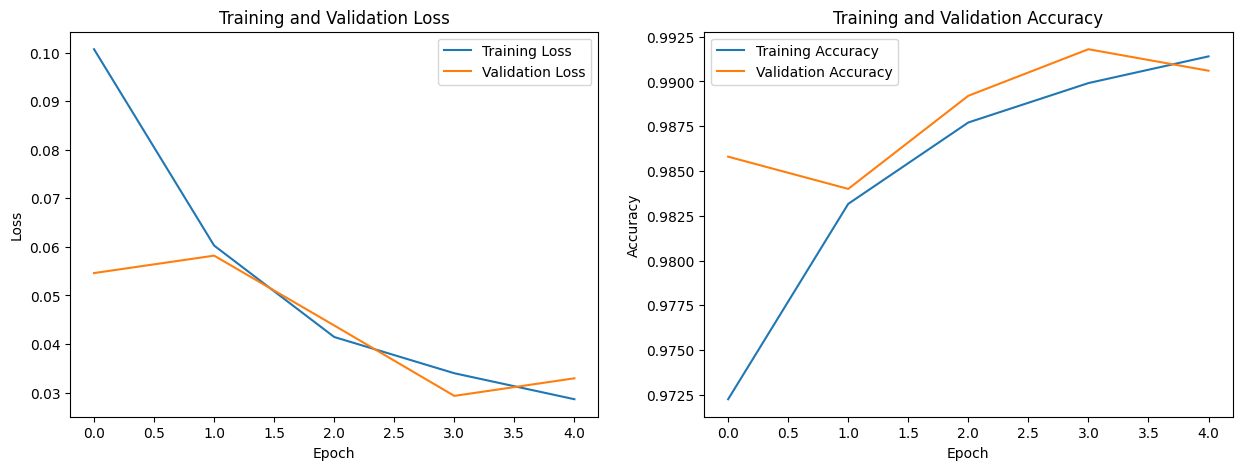

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(history['loss'], label='Training Loss')
ax1.plot(history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(history['accuracy'], label='Training Accuracy')
ax2.plot(history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.savefig('metrics.png')

### Model evaluation on test set

In [45]:
test_evaluation = model.evaluate(X_test, y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.0328 - accuracy: 0.9895
